In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Machine_Learning/train.csv"
df = pd.read_csv(path)

FileNotFoundError: ignored

In [ ]:
df.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [ ]:
print(df['article'])

0         By . Associated Press . PUBLISHED: . 14:11 EST...
1         (CNN) -- Ralph Mata was an internal affairs li...
2         A drunk driver who killed a young woman in a h...
3         (CNN) -- With a breezy sweep of his pen Presid...
4         Fleetwood are the only team still to have a 10...
                                ...                        
287108    By . James Rush . Former first daughter Chelse...
287109    An apologetic Vanilla Ice has given his first ...
287110    America's most lethal sniper claimed he wished...
287111    By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...
287112    (CNN)Former Florida Gov. Jeb Bush has decided ...
Name: article, Length: 287113, dtype: object


In [ ]:
article = []
binArray = []
tfidf_vector_arr = []
entity = []
refehighlights = []
originalLen = []
newLenTfiDF = []
newLenBOW = []

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# Appending the articles in the article array
article = []
refehighlights = []
# i = 0
for art in df['article']:
  # if(i == 1000):
  #   break
  article.append(art)
  # i+=1

i = 0
for ref in df['highlights']:
  # if(i == 1000):
  #   break
  refehighlights.append(ref)
  # i+=1


print(len(article) == len(refehighlights))

True


In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords = list(STOP_WORDS)
stopwords

In [ ]:
from string import punctuation
punctuation = punctuation + '\n'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def count_entity(article,entities):
  # doc = nlp(article)
  # count_s = 0;
  CE = []
  sentences = nltk.sent_tokenize(article)
  for sent in sentences:
    word_c = 0
    doc = nlp(sent)
    for ent in doc.ents:
      if(ent.label_ in entities):
        word_c+=1
    CE.append(word_c)
  return CE

In [ ]:
def sentence_length(article):
  sent_len = []
  sentences = nltk.sent_tokenize(article)
  for sent in sentences:
    word_c = 0
    for word in sent:
      word_c += 1
    sent_len.append(word_c)
  return sent_len

In [ ]:
def count_binArray(article,entites):
  text = article
  binDict = {}
  sentences = nltk.sent_tokenize(text)
  for sent in sentences:
    binDict[sent] = 0

  words = [nltk.word_tokenize(sent) for sent in sentences]
  # Perform part-of-speech (POS) tagging on the words
  pos_tags = [nltk.pos_tag(sent) for sent in words]  
  # Perform named entity recognition (NER) on the POS tagged words
  ne_tags = [nltk.ne_chunk(tagged) for tagged in pos_tags]
  entity_types = entites

  for k,ne in enumerate(ne_tags):
    for subtree in ne.subtrees():
      if subtree.label() in entity_types:
        binDict[sentences[k]] = 1
  fina_bin = []

  for sent in sentences:
    fina_bin.append(binDict[sent])

  return fina_bin



In [ ]:
def count_binArray2(article,entities):
  text = article
  # binDict = {}
  binArray = []

  sentences = nltk.sent_tokenize(article)
  article_ec = 0
  doc_art = nlp(article)
  for ent in doc_art.ents:
    if(ent.label_ in entities):
      article_ec+=1
  
  word_count_art = len(article.split(" "))

  threshold = article_ec/word_count_art

  for sent in sentences:
    sent_ec = 0
    doc = nlp(sent)
    for ent in doc.ents:
      if(ent.label_ in entities):
        sent_ec += 1
    
    score = sent_ec/len(sent.split(" "))
    if(score >= threshold):
      binArray.append(1)
    else:
      binArray.append(0)

  return binArray
    


In [ ]:
def count_vectorizer(article):

  sentences = nltk.sent_tokenize(article)
  fina_CV = []
  for sent in sentences:
    count_dict = {}
    sum1 = 0
    for word in sent:
      if((word not in stopwords) and (word not in punctuation)):
        if(word in count_dict):
          count_dict[word] += 1
        else:
          count_dict[word] = 1
    sum1 = sum(count_dict.values())
    fina_CV.append(sum1)

  return fina_CV

      

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def TfIdf(article):
  tfidf_sen_scores = []
  # stop_words = set(stopwords.words("english"))
  # articles = [article]
  sentences = nltk.sent_tokenize(article)

  # Initialize a TF-IDF vectorizer
  tfidf_vectorizer = TfidfVectorizer()

  # Fit and transform the vectorizer to the list of articles
  tfidf = tfidf_vectorizer.fit_transform(sentences)

  feature_names = tfidf_vectorizer.get_feature_names_out() 

  tfidf_dicts = []
  for i in range(len(sentences)):
    tfidf_scores = tfidf[i].toarray()[0]
    tfidf_dict = dict(zip(feature_names, tfidf_scores))
    tfidf_dicts.append(tfidf_dict)

  
  for score_dict in tfidf_dicts:
    tfidf_sen_scores.append(sum(score_dict.values()))

  return tfidf_sen_scores 

In [ ]:
def filter_entity(entity_types,text):
  entity = set()
  words = nltk.word_tokenize(text)
  tagged = nltk.pos_tag(words)
  entities = nltk.chunk.ne_chunk(tagged)
  for subtree in entities.subtrees():
    if subtree.label() in entity_types:
      entity.add(subtree.label())
  return entity

In [ ]:
entity_types = ['ORGANIZATION', 'PERSON', 'LOCATION', 'DATE', 'TIME']

In [ ]:
# Checking all the methods using article number-3
Samp_art = article[4]
highLight = refehighlights[4]

# Getting the entitites from reference summ
samp_tfidf = TfIdf(Samp_art)
samp_entity = filter_entity(entity_types,highLight)
samp_CE = count_entity(Samp_art,samp_entity)
samp_sen_len = sentence_length(Samp_art)
samp_bin_arr = count_binArray(Samp_art,samp_entity)
samp_bin_arr2 = count_binArray2(Samp_art,samp_entity)
# print(len(samp_CE) == len(samp_sen_len))

In [ ]:
# Feature Extraction using all the methods
final_sent_CE = []
final_sent_len = []
final_sent_bin_arr = []
final_sent_bin_arr2 = []
final_count_vec = []
final_tfidf = []
i = 0
while(i<len(article)):
  if(i>15000):
    break
  Samp_art = article[i]
  highLight = refehighlights[i]

  # Getting the entitites from reference summ
  samp_entity = filter_entity(entity_types,highLight)
  samp_CE = count_entity(Samp_art,samp_entity)
  samp_sen_len = sentence_length(Samp_art)
  samp_bin_arr = count_binArray(Samp_art,samp_entity)
  samp_bin_arr2 = count_binArray2(Samp_art,samp_entity)
  samp_count_vec = count_vectorizer(Samp_art)
  samp_tfidf = TfIdf(Samp_art)


  
  for CE in samp_CE:
    final_sent_CE.append(CE)

  for len_s in samp_sen_len:
    final_sent_len.append(len_s)

  for bin in samp_bin_arr:
    final_sent_bin_arr.append(bin)

  for bin2 in samp_bin_arr2:
    final_sent_bin_arr2.append(bin2)

  for cv in samp_count_vec:
    final_count_vec.append(cv)

  for tf in samp_tfidf:
    final_tfidf.append(tf)


  i += 1

KeyboardInterrupt: ignored

In [ ]:
print(len(final_sent_CE))
print(len(final_sent_len))
print(len(final_sent_bin_arr))
print(len(final_sent_bin_arr2))
print(len(final_count_vec))
print(len(final_tfidf))

48933
48933
48933
48933
48933
48933


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
df_t = pd.DataFrame(list(zip(final_sent_CE,final_sent_len,final_count_vec,final_tfidf,final_sent_bin_arr,final_sent_bin_arr2)),columns = ['Count_Entities','Sentence_Length','Count_Vectorizer','Tf-IDF_Vectorizer','Binary_Score1','Binary_Score2'])

In [ ]:
df_t.head()

,Count_Entities,Sentence_Length,Count_Vectorizer,Tf-IDF_Vectorizer,Binary_Score1,Binary_Score2
0,0,4,3,1.000000,0,0
1,0,18,15,1.414214,0,0
2,0,12,10,1.000000,0,0
3,0,28,25,2.439751,0,0
4,0,3,1,0.000000,0,0


In [ ]:
df0 = df_t[df_t.Binary_Score2 == 0]
df1 = df_t[df_t.Binary_Score2== 1]

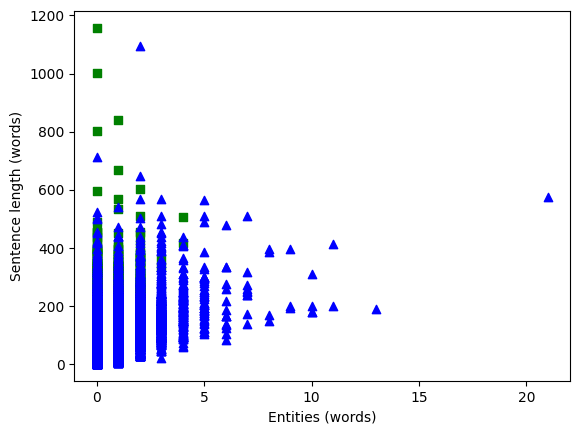

In [ ]:
plt.xlabel('Entities (words)')
plt.ylabel('Sentence length (words)')
plt.scatter(df0['Count_Entities'],df0['Sentence_Length'],color='green',marker='s')
plt.scatter(df1['Count_Entities'],df1['Sentence_Length'],color='blue',marker='^')

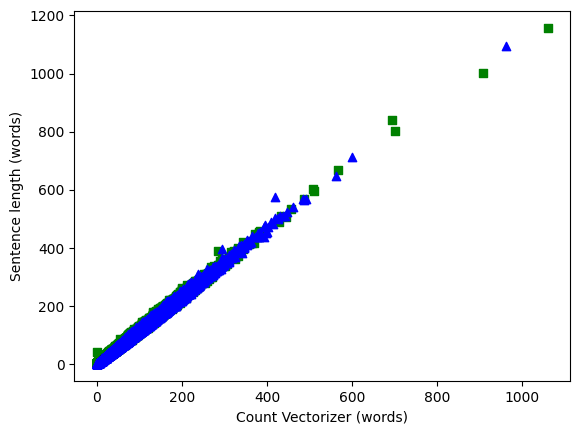

In [ ]:
plt.xlabel('Count Vectorizer (words)')
plt.ylabel('Sentence length (words)')
plt.scatter(df0['Count_Vectorizer'],df0['Sentence_Length'],color='green',marker='s')
plt.scatter(df1['Count_Vectorizer'],df1['Sentence_Length'],color='blue',marker='^')

<h3> This will Remain Constant for All models

In [ ]:
y = df_t.Binary_Score2

In [ ]:
Score_dict = {}

<h3> Model-1 (x1,x2) </h3>

In [ ]:
x12 = df_t.drop(['Sentence_Length','Count_Vectorizer','Binary_Score1','Binary_Score2'],axis='columns')
x12.head()

,Count_Entities,Tf-IDF_Vectorizer
0,0,1.000000
1,0,1.414214
2,0,1.000000
3,0,2.439751
4,0,0.000000


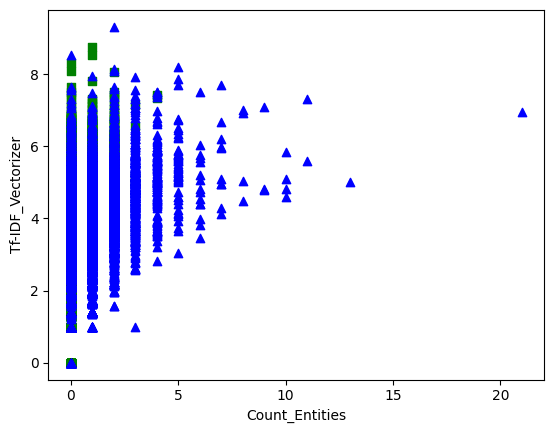

In [ ]:
plt.xlabel('Count_Entities')
plt.ylabel('Tf-IDF_Vectorizer')
plt.scatter(df0['Count_Entities'],df0['Tf-IDF_Vectorizer'],color='green',marker='s')
plt.scatter(df1['Count_Entities'],df1['Tf-IDF_Vectorizer'],color='blue',marker='^')

In [ ]:
x12_train,x12_test,y_train,y_test = train_test_split(x12,y,test_size=0.2)

<h3>Model with all the kernels

Model-1 (RBF)

In [ ]:
model1_rbf = SVC()
model1_rbf.fit(x12_train,y_train)

SVC()

In [ ]:
Score_dict['Model1-rbf'] = model1_rbf.score(x12_test,y_test)
Score_dict['Model1-rbf']

0.8471441708388678

Model-1 (Linear)

In [ ]:
model1_linear = SVC(kernel='linear')
model1_linear.fit(x12_train,y_train)

In [ ]:
Score_dict['Model1-linear'] = model1_linear.score(x12_test,y_test)
Score_dict['Model1-linear']